In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thepbordin/indoor-object-detection")

print("Path to dataset files:", path)

100%|██████████| 367M/367M [00:02<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1


In [8]:
import os

# Виводимо список файлів у головній папці датасету
dataset_path = path
print("Dataset structure:\n")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = " " * 2 * (level + 1)
    for f in files[:5]:  # Виводимо перші 5 файлів у кожній папці
        print(f"{sub_indent}{f}")


Dataset structure:

1/
  data.yaml
  valid/
    labels/
      0d5e7db77f1c27d8.txt
      02d35eb7ad2388f1.txt
      a12ad8a06226a6dd.txt
      images14.txt
      DOR_S3_66.txt
    images/
      DOR_S3_70.JPG
      6383961ebbfed4bd.jpg
      0896f7f8ba671953.jpg
      0da7328a8d12180f.jpg
      0bbea2cd35fe261d.jpg
  train/
    labels/
      02719a20199eaf3f.txt
      cd0f444cde5e6f84.txt
      60b0562e30e0c69a.txt
      c8d7361c8e81ab81.txt
      9.txt
    images/
      92a2fd9a41e602a5.jpg
      994a97bc1ec49cf2.jpg
      31780c088d1708b4.jpg
      2ae027b4be8f51cd.jpg
      2ba0dbc88f47be4f.jpg
  test/
    labels/
      1345.txt
      1047.txt
      127.txt
      1015.txt
      1217.txt
    images/
      1125.png
      923.png
      116.png
      1003.png
      1034.png


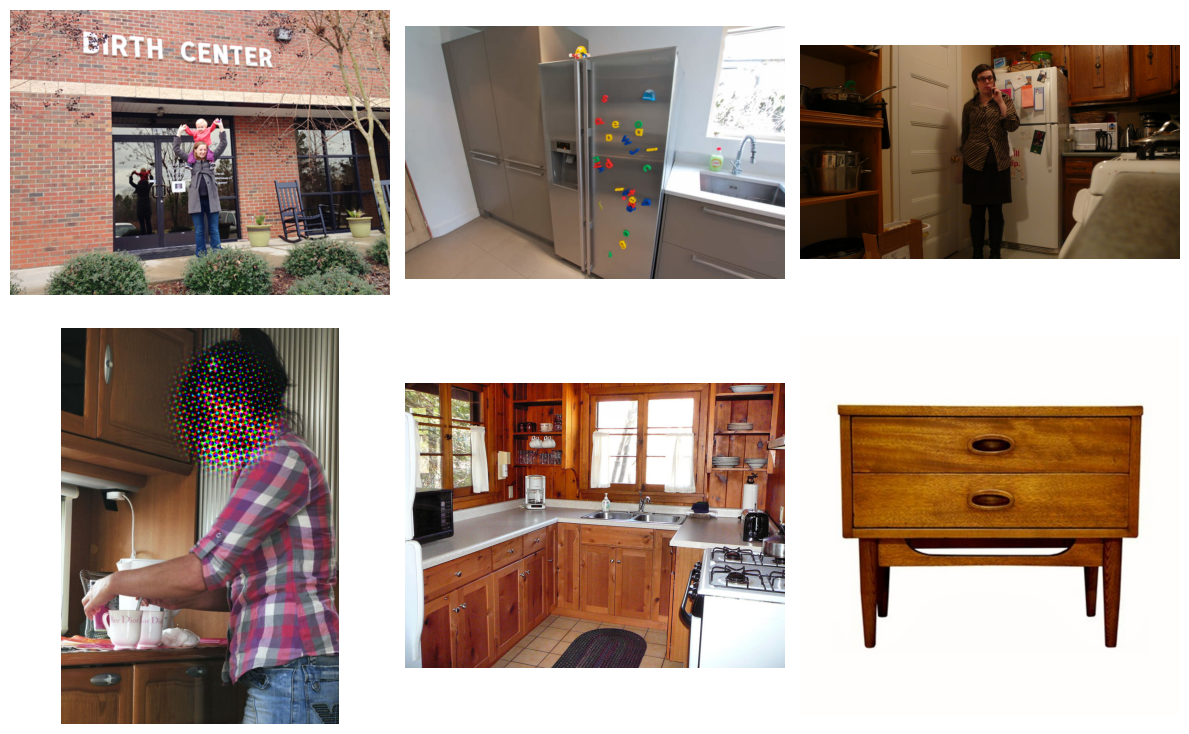

In [9]:
import matplotlib.pyplot as plt
import cv2
import random
from glob import glob

# Отримуємо список всіх зображень у тренувальній папці
train_images = glob(os.path.join(dataset_path, "train", "images", "*.jpg"))

# Вибираємо 6 випадкових зображень
random_images = random.sample(train_images, 6)

# Відображаємо їх
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for img_path, ax in zip(random_images, axes.flat):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [10]:
import yaml

# Відкриваємо data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")
with open(yaml_path, "r") as f:
    data_yaml = yaml.safe_load(f)

# Виводимо вміст data.yaml
print("Data.yaml content:\n", data_yaml)

# Витягуємо класи
class_names = data_yaml["names"]
print("\nClasses:", class_names)


Data.yaml content:
 {'train': '/content/data/train/images', 'val': '/content/data/valid/images', 'test': '/content/data/test/images', 'nc': 10, 'names': ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']}

Classes: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']


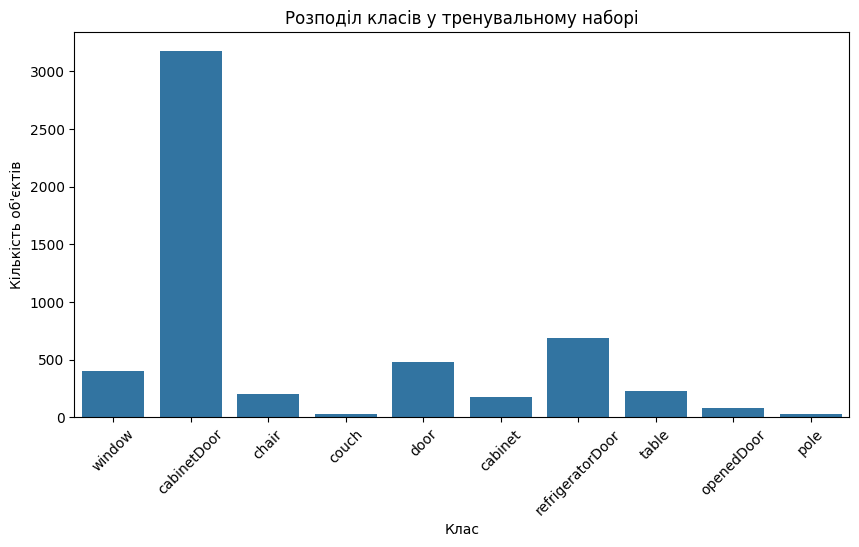

In [11]:
import seaborn as sns
from collections import Counter

# Зчитаємо всі анотації (YOLO формату)
labels_path = os.path.join(dataset_path, "train", "labels")
label_files = glob(os.path.join(labels_path, "*.txt"))

# Лічильник об'єктів у класах
class_counts = Counter()

for label_file in label_files:
    with open(label_file, "r") as f:
        for line in f:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

# Візуалізуємо
plt.figure(figsize=(10, 5))
sns.barplot(x=[class_names[i] for i in class_counts.keys()], y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Клас")
plt.ylabel("Кількість об'єктів")
plt.title("Розподіл класів у тренувальному наборі")
plt.show()


In [12]:
class Config:
    DATASET_PATH = path
    TRAIN_IMAGES = os.path.join(DATASET_PATH, "train", "images")
    VALID_IMAGES = os.path.join(DATASET_PATH, "valid", "images")
    TEST_IMAGES = os.path.join(DATASET_PATH, "test", "images")
    LABELS_PATH = os.path.join(DATASET_PATH, "train", "labels")
    NUM_CLASSES = 10
    CLASS_NAMES = class_names
    BATCH_SIZE = 16
    IMAGE_SIZE = 640  # для YOLO

cfg = Config()
print("Конфігурація збережена!")


Конфігурація збережена!


In [13]:
yaml_content = f"""train: {cfg.TRAIN_IMAGES}
val: {cfg.VALID_IMAGES}
test: {cfg.TEST_IMAGES}

nc: {cfg.NUM_CLASSES}

names:
{chr(10).join(f"- {name}" for name in cfg.CLASS_NAMES)}
"""

# Записуємо в файл
yaml_path = os.path.join(cfg.DATASET_PATH, "yolov9s_config.yaml")
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"Конфігураційний файл створено: {yaml_path}")


Конфігураційний файл створено: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/yolov9s_config.yaml


In [15]:
config_text = """train: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/train/images
val: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/valid/images
test: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/test/images

nc: 10
names: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']
"""

# Записуємо конфігурацію у файл
with open("yolov9s_config.yaml", "w") as f:
    f.write(config_text)

print("Файл конфігурацій створено!")

# Перевіряємо, що файл створено
!cat yolov9s_config.yaml


Файл конфігурації створено!
train: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/train/images
val: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/valid/images
test: /root/.cache/kagglehub/datasets/thepbordin/indoor-object-detection/versions/1/test/images

nc: 10
names: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']


In [16]:
import os
print(os.listdir())


['.config', 'yolov9s_config.yaml', 'sample_data']


In [17]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [18]:
from ultralytics import YOLO

# Завантажуємо YOLOv9s
model = YOLO("yolov9s.pt")

# Виводимо структуру моделі
model.info()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 14.7M/14.7M [00:00<00:00, 114MB/s] 


YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs


(917, 7318368, 0, 27.5552768)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
!yolo task=detect mode=train model=yolov9s.pt data=yolov9s_config.yaml epochs=5 imgsz=640 batch=4 project="/content/drive/MyDrive/YOLO_training"


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=yolov9s_config.yaml, epochs=5, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLO_training, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [3]:
!ls -lah /content/drive/MyDrive/YOLO_training/train

total 5.6M
-rw------- 1 root root 1.6K Feb 16 06:23 args.yaml
-rw------- 1 root root 218K Feb 16 10:24 confusion_matrix_normalized.png
-rw------- 1 root root 184K Feb 16 10:24 confusion_matrix.png
-rw------- 1 root root 628K Feb 16 10:26 events.out.tfevents.1739687027.ec464042c0a6.10318.0
-rw------- 1 root root 318K Feb 16 10:24 F1_curve.png
-rw------- 1 root root 244K Feb 16 06:23 labels_correlogram.jpg
-rw------- 1 root root 242K Feb 16 06:23 labels.jpg
-rw------- 1 root root 351K Feb 16 10:24 P_curve.png
-rw------- 1 root root 252K Feb 16 10:24 PR_curve.png
-rw------- 1 root root 282K Feb 16 10:24 R_curve.png
-rw------- 1 root root  819 Feb 16 10:21 results.csv
-rw------- 1 root root 261K Feb 16 10:24 results.png
-rw------- 1 root root 239K Feb 16 06:24 train_batch0.jpg
-rw------- 1 root root 215K Feb 16 06:24 train_batch1.jpg
-rw------- 1 root root 189K Feb 16 06:24 train_batch2.jpg
-rw------- 1 root root 352K Feb 16 10:21 val_batch0_labels.jpg
-rw------- 1 root root 353K Feb 16 10

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}


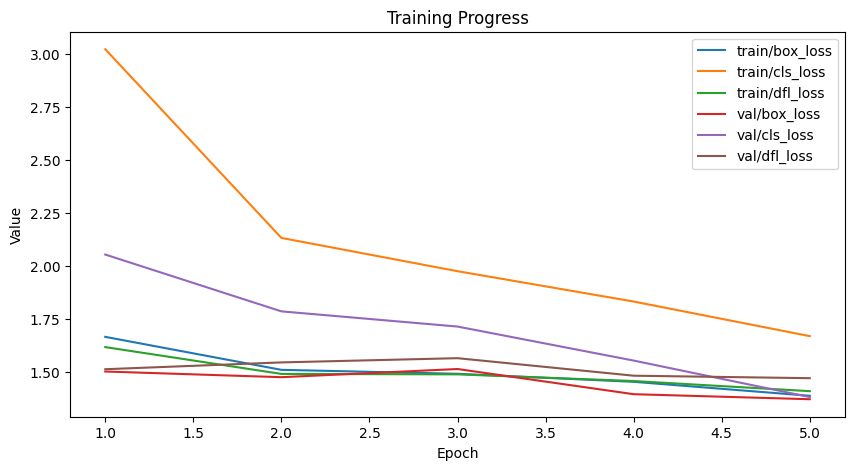

In [7]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

!pip install tensorboard

log_files = glob("/content/drive/MyDrive/YOLO_training/train/events.out.tfevents.1739687027.ec464042c0a6.10318.0")

if log_files:
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

    reader = EventAccumulator(log_files[0])
    reader.Reload()

    print(reader.Tags())

    data = {tag: [] for tag in reader.Tags()['scalars'] if tag in ["train/box_loss", "train/cls_loss", "train/dfl_loss", "val/box_loss", "val/cls_loss", "val/dfl_loss", "metrics/mAP_0.5", "metrics/mAP_0.5:0.95", "metrics/precision", "metrics/recall", "metrics/f1_score"]}


    for tag in data.keys():
        for scalar_event in reader.Scalars(tag):
            data[tag].append((scalar_event.step, scalar_event.value))


    plt.figure(figsize=(10, 5))
    for tag, values in data.items():
        steps, values = zip(*values)
        plt.plot(steps, values, label=tag)
    plt.legend()
    plt.title("Training Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.show()
else:
    print("Файл логів не знайдено!")

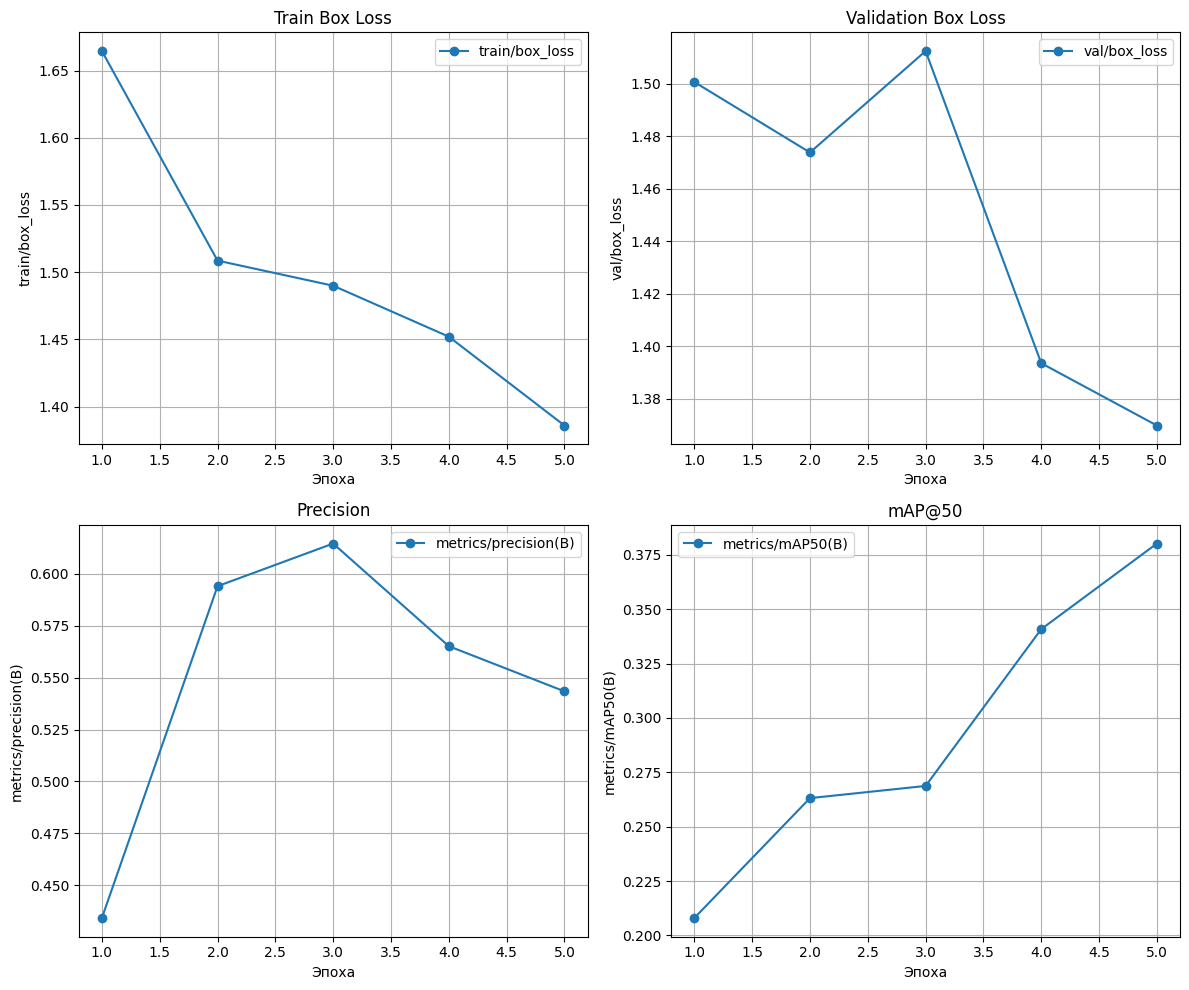

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/YOLO_training/train/results.csv"
df = pd.read_csv(file_path)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

def plot_metric(ax, metric, title):
    ax.plot(df['epoch'], df[metric], label=metric, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Эпоха')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid()

plot_metric(axes[0, 0], 'train/box_loss', 'Train Box Loss')
plot_metric(axes[0, 1], 'val/box_loss', 'Validation Box Loss')
plot_metric(axes[1, 0], 'metrics/precision(B)', 'Precision')
plot_metric(axes[1, 1], 'metrics/mAP50(B)', 'mAP@50')

plt.tight_layout()
plt.show()


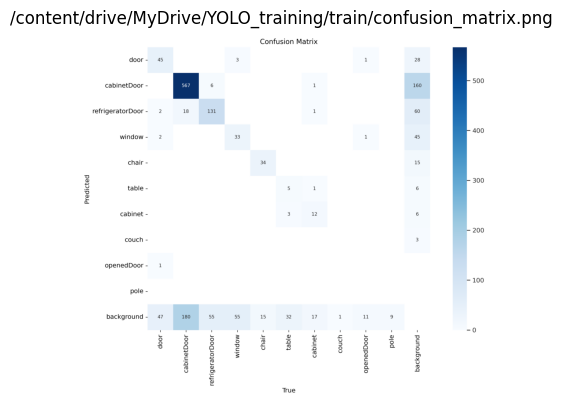

In [15]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

png_files = glob.glob("/content/drive/MyDrive/YOLO_training/train/confusion_matrix.png")

if png_files:
    for file_path in png_files:
        image = mpimg.imread(file_path)

        plt.imshow(image)
        plt.title(file_path)
        plt.axis('off')
        plt.show()
else:
    print("No PNG files found in the current directory.")

# Аналіз помилок моделі
Найкраще модель справляється з класом cabinetDoor, оскільки має найбільше правильних передбачень (567 випадків).

- Найбільші проблеми:

door іноді помилково класифікується як cabinetDoor, background або openedDoor.

refrigeratorDoor має перехресні помилки з cabinetDoor і background.

window часто визначається як background, що свідчить про недостатню виразність ознак цього класу.

table, cabinet і couch зустрічаються рідко та мають низьку точність.

- Можливі причини помилок

Візуальна схожість об'єктів:

door та cabinetDoor можуть бути схожими за формою та кольором, що викликає перехресні помилки.
refrigeratorDoor може бути подібний до cabinetDoor через стиль меблів.
table та cabinet можуть мати подібні текстури або розташування.

Нерівномірний розподіл класів:

Деякі класи мають значно більше прикладів у навчальному наборі (cabinetDoor), що покращує їхню точність.
Рідкісні класи (couch, pole) можуть бути недостатньо представлені, що впливає на їхню коректність.

Фоновий шум:

Велика кількість передбачень як background свідчить про проблему з розрізненням об’єктів від навколишнього середовища.

- Рекомендації для покращення моделі

Балансування датасету:

Можна застосувати oversampling або data augmentation для малопредставлених класів (couch, table, pole).

Додавання додаткових ознак:

Використання контекстної інформації (наприклад, spatial relationships між об'єктами) може зменшити помилки.

Тонке налаштування гіперпараметрів:

Експерименти з learning rate, batch size та loss function можуть покращити розпізнавання окремих класів.

Покращення якості анотацій:

Можливо, помилки викликані не тільки моделлю, а й неточними або неповними мітками в навчальному наборі.
Збільшення кількості епох або використання pre-trained моделей:
Додаткове навчання може покращити результати, особливо для класів, що мають низьку точність.
# Висновок
Загалом модель добре справляється з розпізнаванням cabinetDoor і refrigeratorDoor, але має проблеми з менш частими класами (couch, table, pole). Помилки часто пов'язані з візуальною схожістю об'єктів і домінуванням класу background. Для покращення потрібно збалансувати датасет, оптимізувати гіперпараметри й покращити якість анотацій.